 
 <font size="7"><h1><center>Segmentation and Clustering of Boroughs in London using Metropolitan Police Service (MPS) Borough Level Crime Data & Foursquare API</center></h1></font>  

 <font size="5"><h2><center>Feasible Recommendations for Individuals and Businesses</center></h2></font>  

# Segmentation and Clustering of Boroughs in London using Metropolitan Police Service (MPS) Borough Level Crime Data & Foursquare Developer API: Feasible Recommendations for Individuals and Businesses  

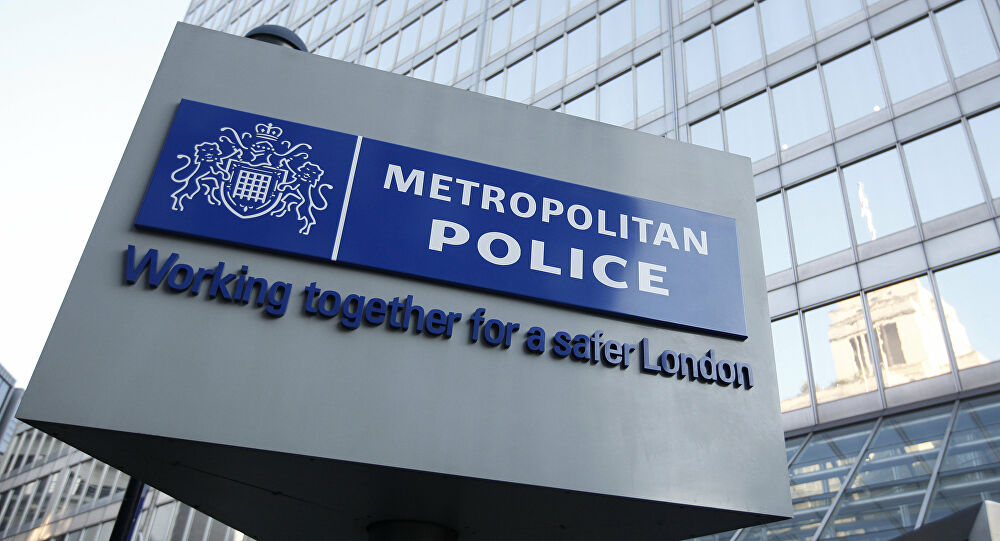

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
display(Image('https://cdn1.img.sputniknews.com/img/106439/10/1064391069_0:0:2952:1597_1000x541_80_0_0_9b7202e1198509b8a18403411e7c5bca.jpg', width=1100, height=800, unconfined=True))


# 1. INTRODUCTION & BUSINESS PROBLEM:  

A family planning to build new home, a potential business owner or contractor looking to setup their office, an international student looking for affordable housing facilities or a traveller interested in exploring the city - all have a pivotal factor in common to be taken into consideration (irrespective of the budget/affordability) before they make a decision: 'SAFETY'.  

In this project, we will study in detail the segmenting, clustering and classification of London Boroughs using [Metropolitan Police Service](https://www.met.police.uk/) data and [Foursquare Developer](https://developer.foursquare.com/) API. As the city grows and develops, it becomes increasingly important to examine and understand it quantitiatively. The MPS provides open data for Developers, Investors, Policy Makers, City Planners who possess an interest in answering the following questions for development and safety of residents:  

- What neighbourhoods have the highest crime?  
- Is population density correlated to crime level?  
- Using Foursquare data, what venues are most common in different locations within the city?  
- Does [London Datastore](https://data.london.gov.uk/) provide with specific enough or thick enough data to empower decisions to be made? Or is it too aggregate to provide value in its current detail? Let's find out.  

# 2. TARGET AUDIENCE:  
1. **Professionals relocating to London for work** - The number of workers in London is projected to increase by 582,000 (up 10%) in the next 10 years. This is the equivalent to about 58,200 more jobs each year. Apprenticeship starts in London more than doubled between 2009/10 and 2010/11 and since then have maintained a fairly steady level.  
2. **International Students & Overseas Nationals** - There were over 5 million international visitors to London in 2019 Q2, up 2.3% from the same quarter a year before. In 2018/19, there were over 240,000 new National Insurance Number (NINo) registrations from overseas nationals in London, which was 2% higher than the year before.  
3. **Small Businesses** - With a potential opportunity to establish their footprint, small businesses benefit from the spending by local communities, travellers and visitors. Total spend by international visitors alone in London was at £12.1bn in 2018 down 10.2% on 2017. Spending in the most recent quarter (2019 Q1) was 1.8%, 6.0% higher compared with the same quarter a year previous.  
4. **Policy Makers** - By grouping the neighbourhoods into most similar groups, the GLA and Mayors Office for Policing and Crime (MOPAC) have enabled both the police and the public to understand performance compared to similar neighbourhoods in London.  
5. **Law Enforcement** - Police and partners now share best practice with like-for-like neighbourhoods. The Metropolitan Police Service actively utilises the [Neighbourhood Confidence and Crime Comparator](https://maps.london.gov.uk/NCC/) at neighbourhood level to identify similar areas where public confidence metrics vary the most, and respond to the challenge of MOPAC to reduce these gaps.  
6. **Families and Communities** - The population of London in 2017 was 8,904,000 up 7% from five years ago. The population is projected to increase to 9.7 million by 2025 (an increase of 17% from the 2011 Census) and reach 10 million by 2030.  
7. **Housing** - In 2019/20 the total number of GLA funded affordable housing starts in London was 12,546 accounting for 90.6% of total London housing starts. In 2018/19 London’s dwelling stock saw a net increase of 35,959 dwellings compared to the year before.  
8. **Voluntary Crime Prevention Movements** - Ex: [Neighborhood Watch](https://www.ourwatch.org.uk/)  




# 3. DATA & DATA SOURCES:  

### 3.1. MPS Borough Level Crime Data:  

[MPS Borough Level Crime Data](https://data.london.gov.uk/dataset/recorded_crime_summary) counts the number of crimes in London at the borough-level per month, based on the crime type. 

The data is available in two files for each level of geography - the most up to date data covering the last available 24 months only and one covering all historic full calendar years. To analyze the most recent patterns, I opted to explore the one with the last available 24 months.

In March 2019, the Metropolitan Police Service started to provide offences grouped by the updated [Home Office crime classifications](https://www.gov.uk/government/publications/counting-rules-for-recorded-crime). This currently only covers the most recent 24 months of data.

Below is a list of the crime types covered under the new HO categories:

**Major Category - Minor Category:**  

- Arson and Criminal Damage - Arson / Criminal Damage  

- Burglary: Burglary - Business and Community / Burglary - Residential**  

- Drug Offences: Drug Trafficking / Possession of Drugs  

- Miscellaneous Crimes Against Society: Absconding from Lawful Custody / Bail Offences / Bigamy / Concealing an Infant Death Close to Birth / Dangerous Driving / Disclosure, Obstruction, False or Misleading State / Exploitation of Prostitution / Forgery or Use of Drug Prescription / Fraud or Forgery Associated with Driver Records / Going Equipped for Stealing / Handling Stolen Goods / Making, Supplying or Possessing Articles for use i / Obscene Publications / Offender Management Act / Other Forgery / Other Notifiable Offences / Perjury / Perverting Course of Justice / Possession of False Documents / Profitting From or Concealing Proceeds of Crime / Soliciting for Prostitution / Threat or Possession With Intent to Commit Crimina / Wildlife Crime  

- Possession of Weapons: Other Firearm Offences / Possession of Firearm with Intent / Possession of Firearms Offences / Possession of Other Weapon / Possession of Article with Blade or Point  

- Public Order Offences: Other Offences Against the State, or Public Order / Public Fear Alarm or Distress / Racially or Religiously Aggravated Public Fear / Violent Disorder  

- Robbery: Robbery of Business Property / Robbery of Personal Property  

- Sexual Offences*: Other Sexual Offences / Rape  

- Theft: Bicycle Theft / Other Theft / Shoplifting / Theft from Person  

- Vehicle Offences: Aggravated Vehicle Taking / Interfering with a Motor Vehicle / Theft from a Motor Vehicle / Theft or Taking of a Motor Vehicle  

- Violence Against the Person: Homicide / Violence with Injury / Violence without Injury  

 
To note:  

Fraud data was transferred from individual police forces to National Action Fraud in March 2013  

 **Prior to April 2017, police recorded burglary offence categories were split such that dwellings (domestic burglary) and buildings other than dwellings (non-domestic burglary) were separately identifiable, where:  

- domestic burglary covers residential premises, including attached buildings such as garages  
- non-domestic burglary covers non-residential premises, including businesses and public buildings, as well as non-attached buildings within the grounds of a dwelling, such as sheds and detached garages
From April 2017 onwards a new classification of police recorded burglary was introduced, dividing offences into two categories of “residential” and “business and community”  

“Residential” burglary includes all buildings or parts of buildings that are within the boundary of, or form a part of, a dwelling and includes the dwelling itself, vacant dwellings, sheds, garages, outhouses, summer houses and any other structure that meets the definition of a building. It also includes other premises used for residential purposes such as houseboats, residential care homes and hostels.  

“Business and community” burglary includes all buildings or parts of buildings that are used solely and exclusively for business purposes or are otherwise entirely outside the classification of residential burglary.  
### 3.2. List of London boroughs:  
The motive behind using this dataset is to fill the gap that our actual crime dataset lacks to address i.e., extract the key attributes or columns from the [List of London boroughs](https://en.wikipedia.org/wiki/List_of_London_boroughs) dataset will help us extract and analyze the attributes including Population Density for each of the 32 boroughs and their respective Co-ordinates.  

### 3.3. Foursquare Location Data:  
The [Foursquare Venues & Places Database](https://developer.foursquare.com/docs/api/venues/details) gives the full details about a venue including location, tips, and categories. We can access precise, up-to-date community-sourced venue data. Its large selection of rich and firmographic location data unlocks the potential to enhance our app or website with the ability to describe locations, analyze trends, and improve user experience.  

If the venue ID given is one that has been merged into another venue, the response will show data about the other venue instead of giving you an error. User authenticated calls will also receive information about who is here now. This is a Premium endpoint with access to venue's photos, tips, hours, menu, categories, recommendations, events, stats, etc.  

Using these 3 major datasets as the basis for our project, let's start leveraging its features and attributes to address our business problem.  

# 4. METHODOLOGY:  
The brief overview of the methodology:

- Importing necessary libraries and loading the data sets of interest  
- Examine the crime frequency by neighbourhood  
- Study the crime types and then pivot analysis of crime type frequency by boroughs  
- Understand correlation between crimes and population density  
- Perform K-Means Clustering Analysis on venues by locations of interest based on findings from crimes and boroughs  
- Determine the venues which are in the proximity of relatively high crime count and choose the locations of interest accordingly    

### 4.1.  Getting started  
- Importing the necessary libraries  
- Load the dataset into pandas dataframe  
- Develop Visualizations that help uncover insights about the crime frequency based on boroughs and crime type  

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # To convert an address into latitude and longitude values

from bs4 import BeautifulSoup # To parse HTML and XML documents
from urllib.request import urlopen
import requests # To handle requests
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

import xml

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # Import K-Means from clustering 

!conda install -c conda-forge folium=0.5.0 --yes
import folium # To generate Leaflet maps

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


In [0]:
# Reading the CSV file into a dataframe using pandas
london_crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
london_crime.head()

,MajorText,MinorText,LookUp_BoroughName,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,3,4,12,6,5,3,8,5,1,5,2,5,5,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,115,122,126,123,127,101,107,131,105,88,97,127,138,130,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,36,24,33,30,18,33,32,39,33,45,24,29,27,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,122,75,93,77,94,84,99,94,106,164,114,107,99,96,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,3,8,6,9,7,10,7,7,3,5,2,6,5,8,6,8,6,6,9,10,2,12,3


In [0]:
london_crime.describe()

,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
count,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000
mean,42.677460,42.495238,45.351746,44.846349,47.489524,44.006984,43.800635,47.143492,47.339048,45.620952,46.092698,44.840635,50.027937,47.547302,49.081270,48.701587,51.859683,48.577143,48.311746,51.645714,49.967619,47.472381,48.217778,44.985397
std,85.198468,82.809988,90.059126,88.978756,96.530794,88.064025,87.273393,94.998995,98.729975,102.798500,99.473603,101.046428,111.403986,108.626472,107.452728,106.646651,111.566967,104.060168,103.168802,112.199983,108.954024,111.198177,100.837662,100.163915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000
75%,43.000000,44.000000,46.000000,45.000000,49.000000,47.000000,47.000000,51.000000,49.000000,44.000000,49.500000,47.000000,53.500000,51.000000,49.500000,53.000000,56.500000,48.500000,49.500000,53.000000,51.000000,45.000000,52.000000,48.000000
max,1082.000000,985.000000,1153.000000,1106.000000,1356.000000,1250.000000,1265.000000,1461.000000,1613.000000,1876.000000,1845.000000,1853.000000,1962.000000,2166.000000,2102.000000,2050.000000,1993.000000,1877.000000,1906.000000,1988.000000,1984.000000,2264.000000,1556.000000,1773.000000


In [0]:
london_crime.shape

(1575, 27)

In [0]:
# Names of Boroughs
london_crime['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [0]:
london_crime.rename(columns={'LookUp_BoroughName': 'BoroughName'}, inplace=True)
london_crime.head()

,MajorText,MinorText,BoroughName,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,3,4,12,6,5,3,8,5,1,5,2,5,5,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,115,122,126,123,127,101,107,131,105,88,97,127,138,130,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,36,24,33,30,18,33,32,39,33,45,24,29,27,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,122,75,93,77,94,84,99,94,106,164,114,107,99,96,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,3,8,6,9,7,10,7,7,3,5,2,6,5,8,6,8,6,6,9,10,2,12,3


In [0]:
# Create a column for sum of incidents in 24 months
london_crime['Number of Incidents'] = london_crime.iloc[:,3:27].sum(axis=1)
crime_count = london_crime['Number of Incidents']
london_crime.drop(labels=['Number of Incidents'], axis=1,inplace = True)
london_crime.insert(3, 'Number of Incidents', crime_count)
london_crime.head()

,MajorText,MinorText,BoroughName,Number of Incidents,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002
0,Arson and Criminal Damage,Arson,Barking and Dagenham,129,6,3,4,12,6,5,3,8,5,1,5,2,5,5,11,3,5,3,6,9,8,6,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2775,115,122,126,123,127,101,107,131,105,88,97,127,138,130,138,113,134,118,109,109,99,121,99,98
2,Burglary,Burglary - Business and Community,Barking and Dagenham,726,38,36,24,33,30,18,33,32,39,33,45,24,29,27,22,27,31,35,37,30,30,25,31,17
3,Burglary,Burglary - Residential,Barking and Dagenham,2430,122,75,93,77,94,84,99,94,106,164,114,107,99,96,114,96,71,67,80,97,114,130,116,121
4,Drug Offences,Drug Trafficking,Barking and Dagenham,155,7,3,8,6,9,7,10,7,7,3,5,2,6,5,8,6,8,6,6,9,10,2,12,3


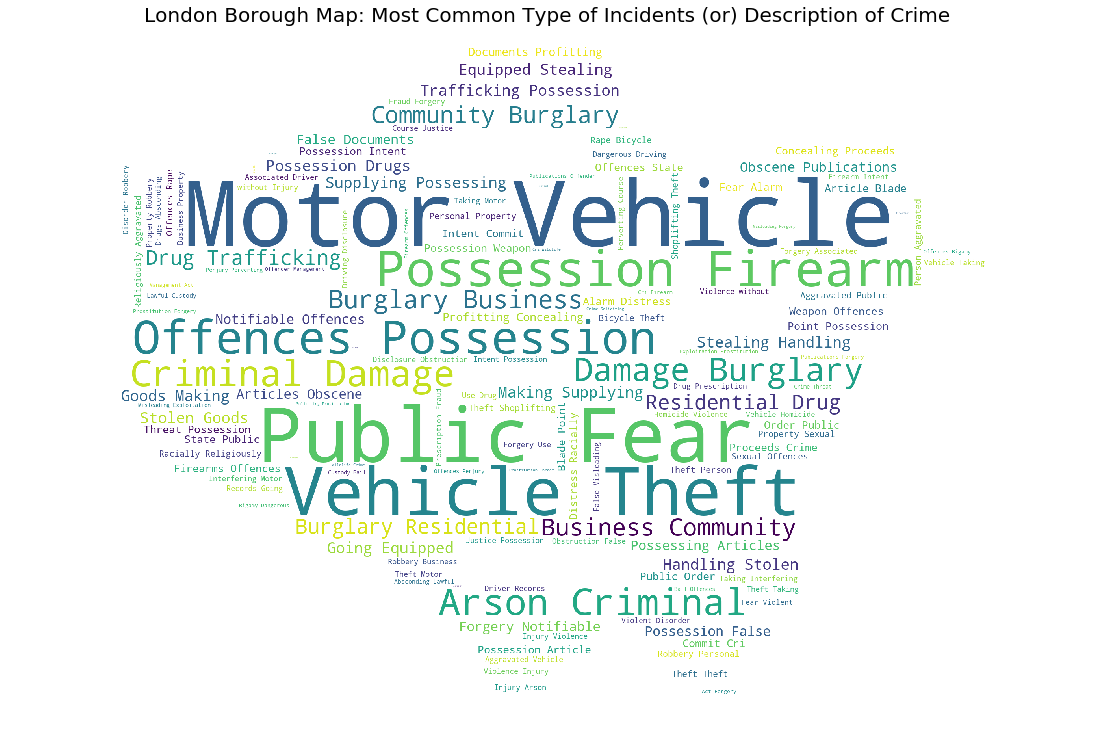

In [0]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
mask = np.array(Image.open("London_plan_sub_regions_2004.png"))
# mask = np.array(Image.open(path.join(d, "London_plan_sub_regions_2004.png")))
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'white', mask=mask, width = 1200, 
               margin=10, height = 1000).generate(str(london_crime['MinorText']))


wc.to_file("london borough map.png")
plt.figure()
plt.title('London Borough Map: Most Common Type of Incidents (or) Description of Crime', fontsize = 20)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [0]:
borough_count = london_crime.groupby(['BoroughName']).size().to_frame(name='BoroughCount').reset_index()
borough_count.sort_values(by=['BoroughCount'], ascending=False) 

,BoroughName,BoroughCount
16,Hounslow,52
9,Greenwich,50
29,Tower Hamlets,50
20,Lambeth,50
11,Hammersmith and Fulham,50
10,Hackney,50
32,Westminster,50
0,Barking and Dagenham,49
6,Croydon,49
5,Camden,49


In [0]:
type_of_incident = london_crime.groupby(['MajorText']).size().to_frame(name='IncidentCount').reset_index()
type_of_incident.sort_values(by=['IncidentCount'], ascending=False) 

,MajorText,IncidentCount
3,Miscellaneous Crimes Against Society,605
4,Possession of Weapons,152
8,Theft,132
9,Vehicle Offences,132
5,Public Order Offences,128
10,Violence Against the Person,97
0,Arson and Criminal Damage,66
1,Burglary,66
2,Drug Offences,66
7,Sexual Offences,66


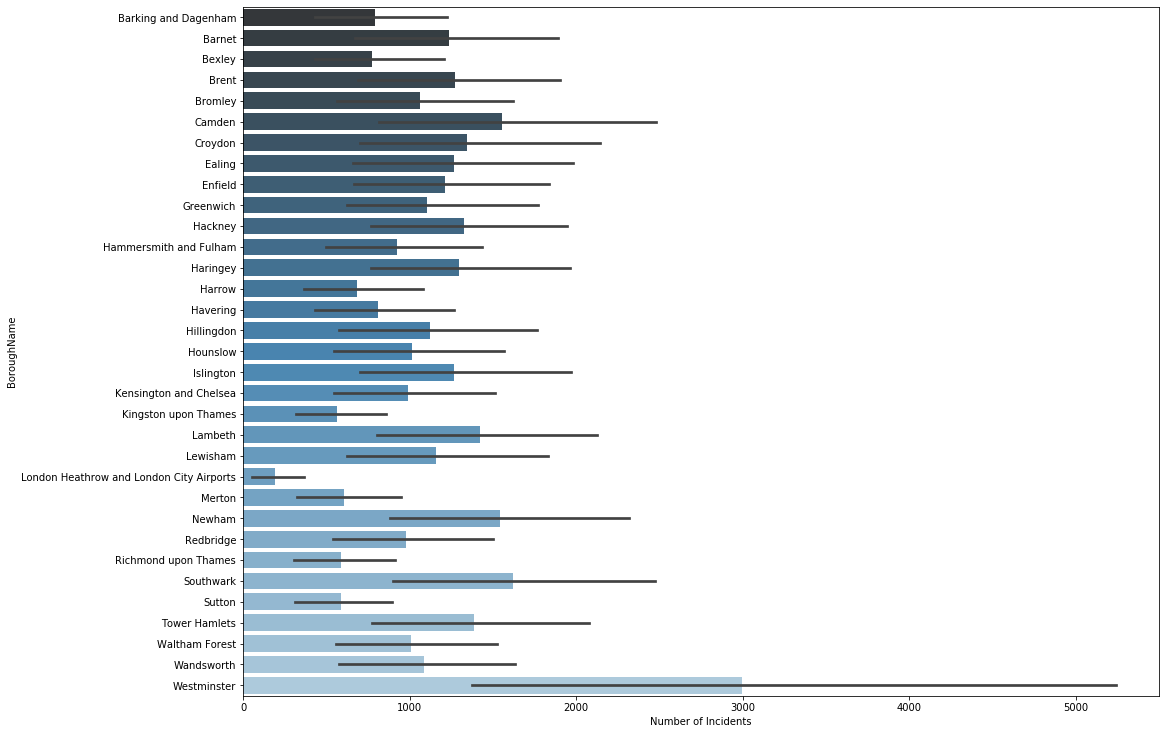

In [0]:
import seaborn as sns

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
# sns.barplot(x = "names", y = "values", ax=ax, data=df)

ax = sns.barplot(x="Number of Incidents", y="BoroughName", data=london_crime, ax=ax,
                 palette="Blues_d")
plt.tight_layout(pad=0)

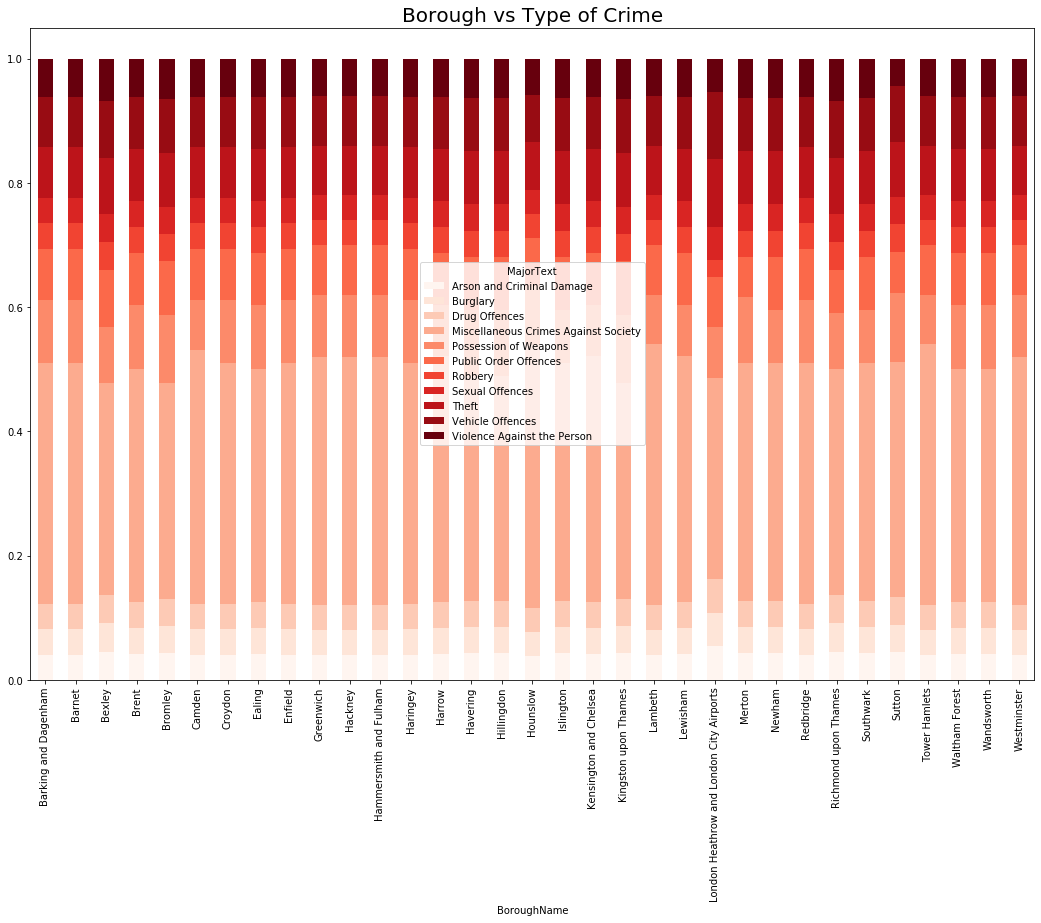

In [0]:
import matplotlib.pyplot as plt

df = pd.crosstab(london_crime['BoroughName'], london_crime['MajorText'])
color = plt.cm.Reds(np.linspace(0, 1, 11))
df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('Borough vs Type of Crime', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [0]:
# Delete unnecessary columns
london_crime.drop(london_crime.columns[0:2], axis=1, inplace=True)
london_crime.drop(london_crime.columns[2:26], axis=1, inplace=True)
london_crime.head()

,BoroughName,Number of Incidents
0,Barking and Dagenham,129
1,Barking and Dagenham,2775
2,Barking and Dagenham,726
3,Barking and Dagenham,2430
4,Barking and Dagenham,155


In [0]:
# Calculate sum of incidents in the last 24 months by boroughs
london_crime = london_crime.groupby(['BoroughName'], as_index=False).sum()
london_crime.head()

,BoroughName,Number of Incidents
0,Barking and Dagenham,38796
1,Barnet,60534
2,Bexley,34099
3,Brent,61154
4,Bromley,48810


In [0]:
# Change the sum into monthly average
london_crime['Number of Incidents'] = london_crime['Number of Incidents']/24
london_crime.rename(columns={london_crime.columns[1]:'MonthlyAverage'}, inplace=True)
london_crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.500000
1,Barnet,2522.250000
2,Bexley,1420.791667
3,Brent,2548.083333
4,Bromley,2033.750000


In [0]:
# Explore the clean dataset - borough with most incidents?
london_crime.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,MonthlyAverage
32,Westminster,6238.916667
27,Southwark,3172.875000
5,Camden,3170.041667
24,Newham,3021.083333
20,Lambeth,2968.333333


In [0]:
### Explore the clean dataset - borough with least incidents?
london_crime.sort_values(by='MonthlyAverage', ascending=True).head()

,BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,291.541667
26,Richmond upon Thames,1075.791667
19,Kingston upon Thames,1077.416667
28,Sutton,1107.291667
23,Merton,1184.666667


### 4.2. List of London Boroughs:  

Information on boroughs and their population & coordinates  
- Population can be used to calcuate the ratio of reported crime to population for better comparison  
- Coordinates can be used to get neighborhood data from Foursquare  
Source: Wikipedia  
URL: https://en.wikipedia.org/wiki/List_of_London_boroughs  

In [0]:
import requests
import lxml
from bs4 import BeautifulSoup

In [0]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XmlM4gpAAEEAADVXD8gAAACN","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":943613985,"wgRevisionId":943613985,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015

In [0]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [0]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [0]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [0]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [0]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [0]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [0]:
info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

### 4.3. Foursquare API

List of top 50 popular places in the neighborhood
source: Foursquare
url: https://api.foursquare.com

In [0]:
CLIENT_ID  = 'well, not sharing this' # your Foursquare ID
CLIENT_SECRET = 'nope' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID )
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:


In [0]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [0]:
print(venues.shape)
venues.head()

(1142, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


### 4.4. Exploratory Data Analysis  
In this section, let's claen the data and explore the the same more thoroughly. Then, conduct cluster analysis to classify the boroughs into different levels of preference by ranking them.  

In [0]:
#Review our data
london_crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.500000
1,Barnet,2522.250000
2,Bexley,1420.791667
3,Brent,2548.083333
4,Bromley,2033.750000


In [0]:
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [0]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


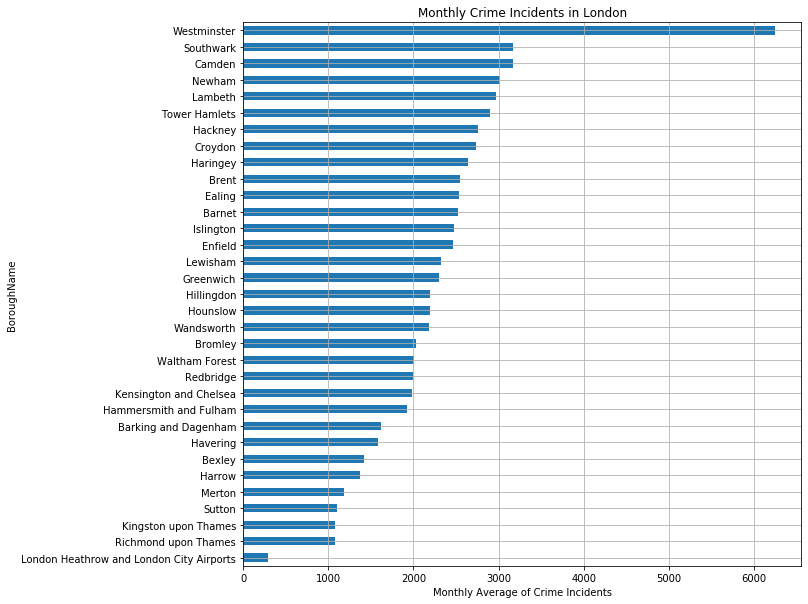

In [0]:
#Visualize crime data
london_crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

From the above bar plot, it is evident that Westminster has the highest number of reported crime incidents, followed by Southwark, Camden, Newham.  

In [0]:
#Combine crime data and borough information data
df = pd.merge(london_crime,info, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1616.500000,194352,51.5607,0.1557
1,Barnet,2522.250000,369088,51.6252,-0.1517
2,Bexley,1420.791667,236687,51.4549,0.1505
3,Brent,2548.083333,317264,51.5588,-0.2817
4,Bromley,2033.750000,317899,51.4039,0.0198


In [0]:
#Check data type
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [0]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [0]:
df.shape

(32, 5)

In [0]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1616.500000,194352,51.5607,0.1557,8.317383
1,Barnet,2522.250000,369088,51.6252,-0.1517,6.833736
2,Bexley,1420.791667,236687,51.4549,0.1505,6.002829
3,Brent,2548.083333,317264,51.5588,-0.2817,8.031429
4,Bromley,2033.750000,317899,51.4039,0.0198,6.397472


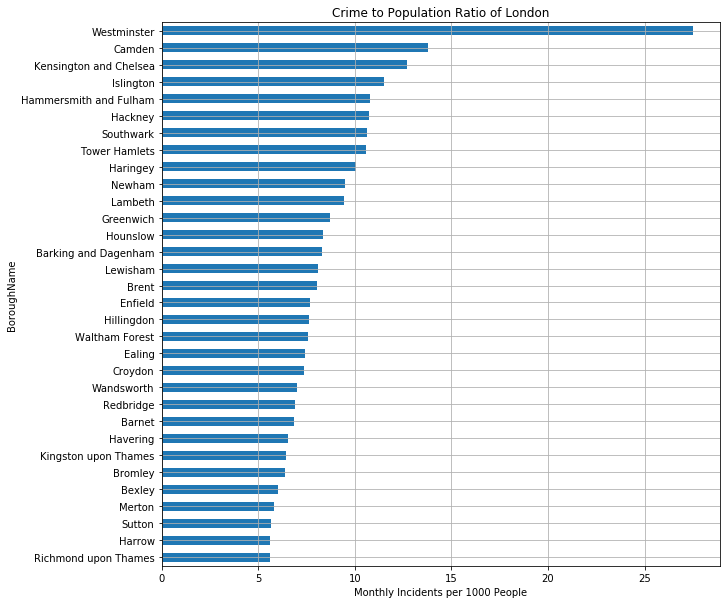

In [0]:
#Visualize crime per 1000 people
df.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [0]:
import folium
from geopy.geocoders import Nominatim

In [0]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [0]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# Instantiate a feature group for the incidents in the dataframe
#incidents = folium.map.FeatureGroup()

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    #)

  # add incidents to map
#map.add_child(Number of Incidents)
    
map

We can see that Westminster and Camden still remains top 2 dangerous area even after taking population into consideration.

### 4.5. Cluster Analysis of Boroughs using K-Means  
In this part, we will conduct K-Means Clustering to group the boroughs based on the recreational, convenience facilities they possess as provided by the Foursquare data.  

In [0]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 175 uniques categories.


In [0]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [0]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food Court,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Shopping Mall,Smoothie Shop,Social Club,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,

In [0]:
onehot.shape

(1142, 176)

In [0]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food Court,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Shopping Mall,Smoothie Shop,Social Club,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.00,0.00000,0.00000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00000,0.00000,0.000000,0.000000,0.00000,0.00,0.000000,0.00,0.00,0.00000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.00000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000,0.00,0.000000,0.00,0.00000,0.00,0.142857,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,0.00,0.00,0.00000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.142857,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.142857,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00000,0.00000,0.00,0.000000,0.00000,0.00,0.00,0.142857,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.00000,0.00
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,

In [0]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Pool  0.14
1                  Park  0.14
2           Supermarket  0.14
3           Golf Course  0.14
4  Gym / Fitness Center  0.14


----Barnet----
                venue  freq
0                Café  0.67
1            Bus Stop  0.33
2  African Restaurant  0.00
3           Nightclub  0.00
4        Optical Shop  0.00


----Bexley----
                venue  freq
0      Clothing Store  0.10
1                 Pub  0.10
2         Coffee Shop  0.10
3  Italian Restaurant  0.06
4            Pharmacy  0.06


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.06
3  Sporting Goods Shop  0.06
4        Grocery Store  0.06


----Bromley----
                  venue  freq
0           Coffee Shop  0.13
1        Clothing Store  0.10
2           Pizza Place  0.05
3  Gym / Fitness Center  0.05
4                   Bar  0.05


----Camden----
         venue  

In [0]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Golf Course,Dumpling Restaurant,Fish & Chips Shop,Field
1,Barnet,Café,Bus Stop,Yoga Studio,Cupcake Shop,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant
2,Bexley,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Grocery Store,Furniture / Home Store
3,Brent,Coffee Shop,Hotel,Sporting Goods Shop,Grocery Store,Clothing Store,Bar,American Restaurant,Sandwich Place,Burger Joint,Café
4,Bromley,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Burger Joint,Bar,Burrito Place,Sandwich Place,Chocolate Shop,Pub


K-Means Clustering:

In [0]:
# K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [0]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1616.500000,194352,51.5607,0.1557,8.317383,0,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Golf Course,Dumpling Restaurant,Fish & Chips Shop,Field
1,Barnet,2522.250000,369088,51.6252,-0.1517,6.833736,1,Café,Bus Stop,Yoga Studio,Cupcake Shop,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant
2,Bexley,1420.791667,236687,51.4549,0.1505,6.002829,0,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Grocery Store,Furniture / Home Store
3,Brent,2548.083333,317264,51.5588,-0.2817,8.031429,0,Coffee Shop,Hotel,Sporting Goods Shop,Grocery Store,Clothing Store,Bar,American Restaurant,Sandwich Place,Burger Joint,Café
4,Bromley,2033.750000,317899,51.4039,0.0198,6.397472,0,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Burger Joint,Bar,Burrito Place,Sandwich Place,Chocolate Shop,Pub


In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4.6. Segmenting & Classification of Top 5 Clusters  
Now, let's observe each cluster and name them based on their characteristics accordingly.

In [0]:
# Cluster 0: Healthy area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,8.317383,0,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Golf Course,Dumpling Restaurant,Fish & Chips Shop,Field
2,Bexley,6.002829,0,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Grocery Store,Furniture / Home Store
3,Brent,8.031429,0,Coffee Shop,Hotel,Sporting Goods Shop,Grocery Store,Clothing Store,Bar,American Restaurant,Sandwich Place,Burger Joint,Café
4,Bromley,6.397472,0,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Burger Joint,Bar,Burrito Place,Sandwich Place,Chocolate Shop,Pub
5,Camden,13.799649,0,Coffee Shop,Café,Hotel,Pizza Place,Tapas Restaurant,Bakery,Train Station,Breakfast Spot,Hotel Bar,Plaza
6,Croydon,7.348273,0,Pub,Coffee Shop,Asian Restaurant,Portuguese Restaurant,Museum,Mediterranean Restaurant,Korean Restaurant,Bookstore,Gaming Cafe,Breakfast Spot
7,Ealing,7.398061,0,Coffee Shop,Hotel,Park,Bar,Bakery,Burger Joint,Pizza Place,Vietnamese Restaurant,Pub,Italian Restaurant
8,Enfield,7.703921,0,Coffee Shop,Clothing Store,Optical Shop,Sandwich Place,Pub,Supermarket,Shopping Mall,Restaurant,Café,Mobile Phone Shop
9,Greenwich,8.732374,0,Supermarket,Fast Food Restaurant,Coffee Shop,Clothing Store,Pub,Plaza,Grocery Store,Pharmacy,Sandwich Place,Hotel
10,Hackney,10.737084,0,Pub,Cocktail Bar,Coffee Shop,Bakery,Café,Clothing Store,Brewery,Grocery Store,Department Store,Organic Grocery


In [0]:
# Cluster 1: Lively area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.833736,1,Café,Bus Stop,Yoga Studio,Cupcake Shop,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant


In [0]:
# Cluster 2: Busy area (Coffee shops, Clothing stores)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Newham,9.493485,2,Hotel,Airport Service,Airport,Pharmacy,Rafting,Sandwich Place,Light Rail Station,Chinese Restaurant,Yoga Studio,Dumpling Restaurant


In [0]:
# Cluster 3: Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Harrow,5.629242,3,Indian Restaurant,Indie Movie Theater,Convenience Store,Coffee Shop,Supermarket,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Field


In [0]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.352959,4,Park,Indian Restaurant,Airport Lounge,Fast Food Restaurant,Café,Restaurant,Dumpling Restaurant,Fish Market,Fish & Chips Shop,Field


Now, let's review all the analysis and key observations before coming up with recommendations and conclusion on narrowing down our research to provide safer boroughs. As mentioned in the earlier sections, our key criteria of location decision will be based on safety and atmosphere.  

# 5. RESULTS

### 5.1 Safety and Safety Score:  
Safety can be determined by the crime rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.  

In [0]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,BoroughName,CrimeToPop,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,27.503479,6238.916667,226841,51.4973,-0.1372,0,Coffee Shop,Hotel,Theater,Sandwich Place,Sporting Goods Shop,Sushi Restaurant,Juice Bar,Hotel Bar,Market,Breakfast Spot
5,Camden,13.799649,3170.041667,229719,51.5290,-0.1255,0,Coffee Shop,Café,Hotel,Pizza Place,Tapas Restaurant,Bakery,Train Station,Breakfast Spot,Hotel Bar,Plaza
18,Kensington and Chelsea,12.724623,1979.875000,155594,51.5020,-0.1947,0,Café,Clothing Store,Burger Joint,Bakery,Restaurant,English Restaurant,French Restaurant,Juice Bar,Modern European Restaurant,Gym / Fitness Center
17,Islington,11.503073,2480.833333,215667,51.5416,-0.1022,0,Pub,Bakery,Cocktail Bar,Mediterranean Restaurant,Theater,Boutique,Music Venue,Ice Cream Shop,French Restaurant,Burger Joint
11,Hammersmith and Fulham,10.770350,1924.500000,178685,51.4927,-0.2339,0,Pub,Indian Restaurant,Italian Restaurant,Gastropub,Japanese Restaurant,Clothing Store,Café,Polish Restaurant,Plaza,French Restaurant
10,Hackney,10.737084,2763.500000,257379,51.5450,-0.0553,0,Pub,Cocktail Bar,Coffee Shop,Bakery,Café,Clothing Store,Brewery,Grocery Store,Department Store,Organic Grocery
26,Southwark,10.630679,3172.875000,298464,51.5035,-0.0804,0,Coffee Shop,Hotel,Pub,Theater,English Restaurant,Indian Restaurant,Art Gallery,Hotel Bar,Pizza Place,Cocktail Bar
28,Tower Hamlets,10.604395,2893.833333,272890,51.5099,-0.0059,0,Italian Restaurant,Hotel,Coffee Shop,Café,Gym / Fitness Center,Convenience Store,Grocery Store,Pub,Chinese Restaurant,Outdoor Sculpture
12,Haringey,10.036600,2643.500000,263386,51.6000,-0.1119,0,Fast Food Restaurant,Convenience Store,Grocery Store,Movie Theater,Sandwich Place,Mediterranean Restaurant,Supermarket,Discount Store,Bar,Bakery
23,Newham,9.493485,3021.083333,318227,51.5077,0.0469,2,Hotel,Airport Service,Airport,Pharmacy,Rafting,Sandwich Place,Light Rail Station,Chinese Restaurant,Yoga Studio,Dumpling Restaurant


### 5.2. Atmosphere & Cluster Classification  
Based on the cluster analysis results, let us give each cluster a name depending on the characteristics inferrable from the popular venues around.  

Based on the results and observations, Cluster 0 can be categorized as a 'Recreational Area' with gyms, parks, pools and golf courses as popular places.  

In [0]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Barking and Dagenham', 'Bexley', 'Brent', 'Bromley', 'Camden',
       'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Havering', 'Hillingdon',
       'Islington', 'Kensington and Chelsea', 'Kingston upon Thames',
       'Lambeth', 'Lewisham', 'Merton', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

Cluster 1 can be categorized as 'Live & Electric Neighborhood' with many pubs and restaurants.  

In [0]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Barnet'], dtype=object)

Cluster 2 can be categorized as 'Shopping District' with many coffee shops and clothing stores.  

In [0]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Newham'], dtype=object)

Cluster 3 can be ategorized as 'Peaceful & Quiet Neighborhood' with cafe, bus stop, and yoga studio as top venues.  

In [0]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Harrow'], dtype=object)

Cluster 4 can be categorized as 'Traveller or Tourist Destination' with bed & breakfast, hotels, and airport.  

In [0]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Hounslow'], dtype=object)

In [0]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

,BoroughName,CrimeToPop,Cluster Labels
0,Barking and Dagenham,8.317383,0
1,Barnet,6.833736,1
2,Bexley,6.002829,0
3,Brent,8.031429,0
4,Bromley,6.397472,0


In [0]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barking and Dagenham,8.317383,0,0.876806
1,Barnet,6.833736,1,0.944609
2,Bexley,6.002829,0,0.982581
3,Brent,8.031429,0,0.889874
4,Bromley,6.397472,0,0.964546


In [0]:
score['Atmosphere'] = 0
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.317383,0,0.876806,0
1,Barnet,6.833736,1,0.944609,0
2,Bexley,6.002829,0,0.982581,0
3,Brent,8.031429,0,0.889874,0
4,Bromley,6.397472,0,0.964546,0


In [0]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.317383,0.8,0.876806,0.0
1,Barnet,6.833736,1.0,0.944609,0.9
2,Bexley,6.002829,0.8,0.982581,0.0
3,Brent,8.031429,0.8,0.889874,0.0
4,Bromley,6.397472,0.8,0.964546,0.0


In [0]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Atmosphere,Score
1,Barnet,0.944609,0.9,1.844609
23,Newham,0.823058,1.0,1.823058
13,Harrow,0.999654,0.7,1.699654
25,Richmond upon Thames,1.000000,0.0,1.000000
27,Sutton,0.998617,0.0,0.998617
22,Merton,0.990507,0.0,0.990507
2,Bexley,0.982581,0.0,0.982581
4,Bromley,0.964546,0.0,0.964546
19,Kingston upon Thames,0.961707,0.0,0.961707
14,Havering,0.956836,0.0,0.956836


### 5.3. Inference based on Safety Scores  
From our analysis, we have found that the five boroughs below are the best places to move in, based on safety and atmosphere of the neighborhood. The top five boroughs all mostly belong to the 'Shipping District' cluster, which is busy for the most part of a day. Therefore, what differentiates them apart is the Safety Score, which was calculated from monthly recorded crimes per 1000 people.  

In [0]:
df_top5 = df.iloc[[13,27,2,22,19],:]
df_top5

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
13,Harrow,1370.000000,243372,51.5898,-0.3346,5.629242
27,Sutton,1107.291667,195914,51.3618,-0.1945,5.651927
2,Bexley,1420.791667,236687,51.4549,0.1505,6.002829
22,Merton,1184.666667,203223,51.4014,-0.1958,5.829393
19,Kingston upon Thames,1077.416667,166793,51.4085,-0.3064,6.459604


In [0]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

### 5.4. Key Insights & Takeaways  

- In May 2019 the total number of offences in London was 75717 - up 6.1% from the same month last year and up 1.2% from the previous month.  
- Over the last 12 months, 25 of London's 32 Boroughs have seen an increase in the number of crimes committed compared with the previous 12 months. The biggest increase was seen in Westminster (up 23.3%) while the largest fall in crime was seen in Islington (down 6.8%).  
- The number of crimes on the transport network in the quarter Jul-Sept 2019/20 (9,043) was up 15.2 per cent compared with the same quarter in 2018/19 (7,853).  


Let's review the goals of this project.  

The idea for the Capstone Project is to show that when driven by venue and location data from FourSquare, backed up with open source crime data, that it is possible to present the cautious and nervous traveller with a list of attractions to visit supplementd with a graphics showing the occurance of crime in the region of the venue.  

A general, broader perspective of this project:  

- Individuals or Businesses decide on a City of intent to move in or set up their offices (London, in this case)  
- The Foursquare API is scrapped for the top venues in the city  
- From this list of top venues the list is augmented with additional grographical data  
- Based on the additional geographical data the nearby, relatively safer locations of interest are chosen  
- The historical crime within a predetermined distance of all venues are obtained  
- A map is presented to the to the individual, potential business owner or traveller with the selected venues and crime statistics of the area  

# 6. DISCUSSION:  

**Observations:**  
- The [London Datastore - Greater London Authority](https://data.london.gov.uk/) enables us to gain an understanding of the crime volume by type by area but not specific enough to understand the distribution properties.  
- Valuable questions such as, "are these crimes occuring more often in a specific area and at a certain time by a specific demographic of people?" cannot be answered nor explored due to what is reasonably assumed to be personal and private information with associated legal risks.  
- There is value to the city to explore the detailed crime data using data science to predict frequency, location, timing and conditions to best allocated resources for the benefit of its citizens and it's police force. However, human behaviour is complex requiring thick profile data by individual and the conditions surrounding the event(s).  

**Programs by [The Mayor's Office for Policing And Crime (MOPAC)](https://www.london.gov.uk/what-we-do/mayors-office-policing-and-crime-mopac):**  
- The Mayor investing in services that would substantially help reduce crime by supporting young people at risk of or engaged in serious violence and help them into employment, education or training: [Young Londoners Fund](https://www.london.gov.uk/what-we-do/education-and-youth/young-londoners/mayors-young-londoners-fund), [The London Gang Exit (LGE) Service](https://www.london.gov.uk/what-we-do/mayors-office-policing-and-crime-mopac/our-priorities/gangs-and-serious-youth-violence-0), [Stepping Stones Programme](https://www.youtube.com/watch?v=Q57JuagCLqo&feature=youtu.be), [London Needs You Alive](https://www.london.gov.uk/content/london-needs-you-alive), [Safer School Officers](https://www.london.gov.uk/questions/2017/2816)  

**Recommendations to tackle and prevent the top 3 high frequency crime types:**  

Recommendations to combat Residential Burglary:  
- Prpert Marking: Make your valuables less attractive to thieves by using a property or police approved forensic marking solution only visible under Ultraviolet (UV) light. This can take the form of a special marker using ink or paint. Mark or etch your property with your postcode, house or flat number or the first three letters of your address. All of these measures help police identify stolen goods, making it harder for thieves to sell  
- Register your valuables using an accredited property database  
- [MetTrace](https://www.met.police.uk/police-forces/metropolitan-police/areas/about-us/about-the-met/campaigns/MetTrace/) is our project to reduce burglary across London through forensic property marking  
- If you opt for a safe in your home, make sure it's fire rated. Home safes are also insurance rated according to the type and value of items designed to be kept inside, so check with your insurance company first to make sure you're adequately covered  
- Install a [visual burglar alarm](https://www.verisure.co.uk/burglar-alarm/alarm-sign), [shed or garage burglar alarm](https://www.verisure.co.uk/home-alarm/garages), adequate outdoor lighting  
- Leave radios and lights on a timer  
- Join or form a [Neighbourhood Watch scheme](https://www.ourwatch.org.uk/)  

Recommendations to combat Burglary at Businesses:  
- Businesses need to make sure they have a monitored alarm and that it’s fully operational as approved by the [NSI](https://www.nsi.org.uk/information-centre/information-for-businesses/) and [SSAIB](https://ssaib.org/)  
- Other Safety Devices: Anti-ram raider bollards, bolted-down safe with a time lock and anti-tamper sensors, smoke-generating devices that activate on unauthorised entry, etc.  

Recommendations to combat Motor Vehicle Theft:  
- [Park Mark](http://www.parkmark.co.uk/car-park-finder), a Safer Parking Scheme signage, helps drivers find car parks where they can confidently leave their vehicle, knowing the environment is safer  
- Watch for illegal, suspicious tow trucks. [Thatcham Security](https://thatchamfitters.co.uk/car/cars-with-factory-fitted-thatcham-security/) category 1 or 2 alarm system with tracking, immobilisation, anti-grab and movement sensors can help protect and trace your vehicle  
- [Before you buy a used vehicle, check for cloning](https://www.gov.uk/checks-when-buying-a-used-car): When buying a vehicle, always check the DVLA V5 document and make sure the Vehicle Identification Number (VIN) on the vehicle is the same as on the document  
- Secure your port: Many modern vehicles are fitted with engine management diagnostic ports, which can be accessed without the thief needing to open the vehicle doors, boot or bonnet, but which can unlock and start your vehicle  
- Secure bikes by locking them to an immovable object within a locked shed or garage  

For Commuters & Visitors:  
- Be assertive: From the moment you step out onto the street in the morning, look assertive and act and walk with confidence. This will always make you appear in control and much less vulnerable  
- Always try to avoid sitting in an empty carriage of a double-decker night bus, train where you are more vulnerable  

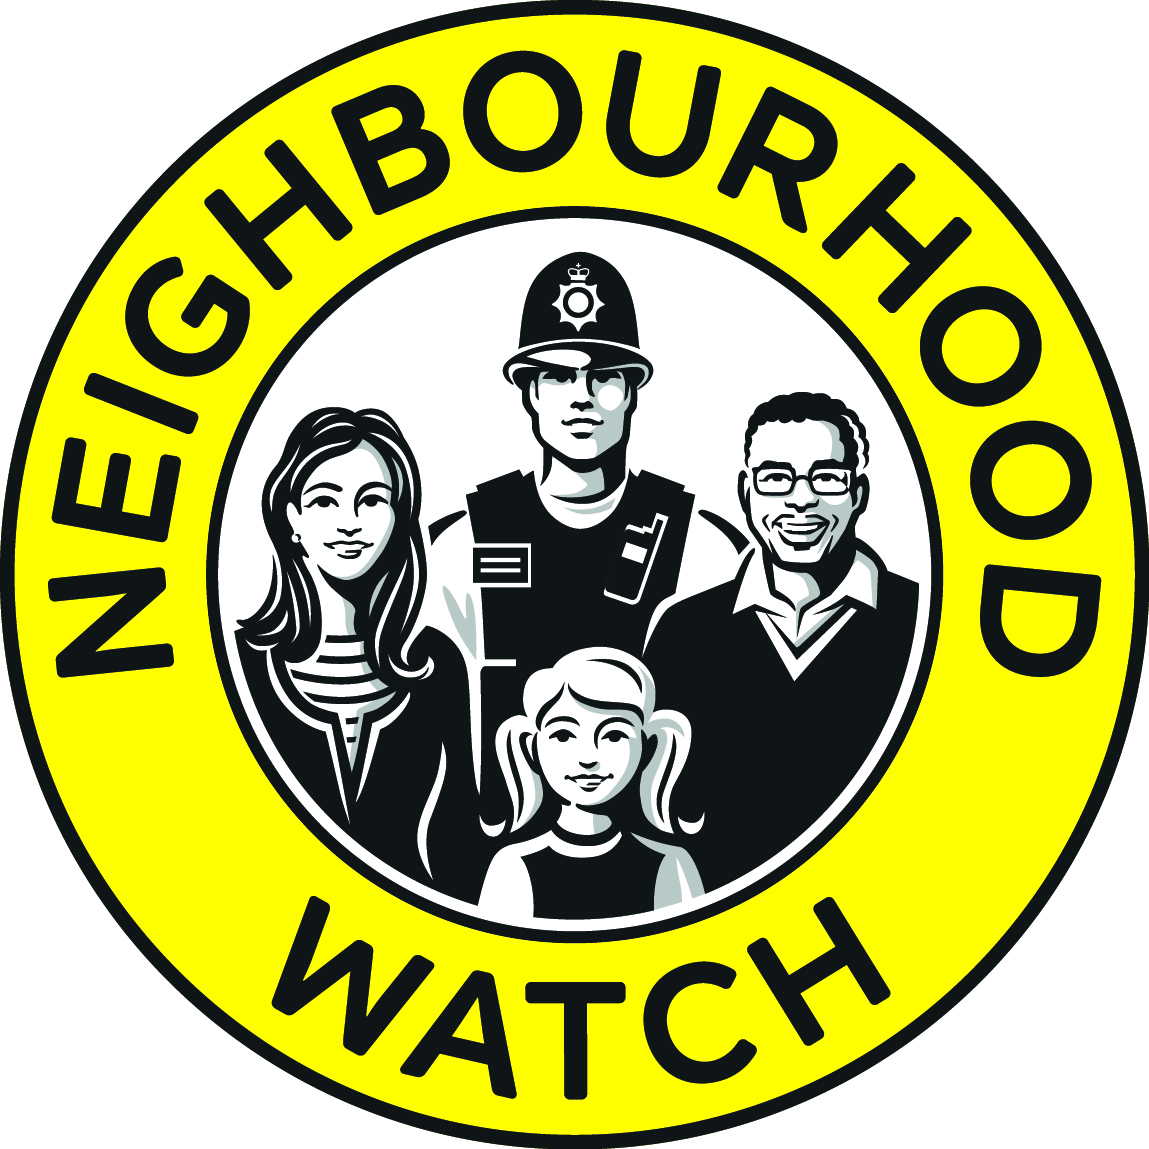

In [0]:
from IPython.display import Image
from IPython.core.display import HTML
display(Image('https://www.ourwatch.org.uk/sites/default/files/documents/2020-02/NHW_Roundel_Logo-Badge_CMYK_Final.jpg', width=1100, height=800, unconfined=True))

# 7. CONCLUSION:  

Although all of the goals of this project were met there is definitely room for further improvement and development as noted below. With some more work, could easily be devleoped into a fully phledged application that could support the cautious traveller in an unknown location.  

**A better Police Service for London**  
Wherever you live in the capital, and whatever your background, you should expect the same service from the Metropolitan Police Service (MPS).  

Providing the best service to all Londoners is at the heart of the [Police and Crime Plan](https://www.london.gov.uk/what-we-do/mayors-office-policing-and-crime-mopac/police-and-crime-plan-safer-city-all-londoners) and means getting the important things right: making communities safer, responding to and preventing crime, building trust and confidence, and bringing criminals to justice.  

**What MPS is doing?**  
To make the police service in London better we are:  

- Making [record investment](https://www.london.gov.uk/press-releases/mayoral/budget-proposes-additional-234m-for-policing) from City Hall into the Metropolitan Police Service.  
- Funding the [recruitment of more police officers](https://www.met.police.uk/car/careers/) for London - bringing numbers back over 30,000.  
- Providing the latest equipment and technology for officers, such as [body-worn video](https://www.met.police.uk/bwv/) cameras and mobile data tablets.  
- Investing in a new [counter-terror hub](https://www.london.gov.uk/press-releases/mayoral/mayor-confirms-new-counter-terror-hub-investment) for London.  
- Overseeing the work of the Metropolitan Police on behalf of Londoners, scrutinising key issues such as the [MPS Gangs Matrix](https://www.london.gov.uk/mopac-publications-0/review-mps-gangs-matrix) and [the use of Facial Recognition](https://www.london.gov.uk/press-releases/mayoral/future-framework-for-facial-recognition-software) technology.  

Get involved  
Find out about community projects and schemes you can get involved with in your area:  

[Safer Neighbourhood Boards](https://www.london.gov.uk/what-we-do/mayors-office-policing-and-crime-mopac/my-area-0/safer-neighbourhood-boards)  
[Independent Custody Visitors](https://www.london.gov.uk/what-we-do/mayors-office-policing-and-crime-mopac/community-safety/independent-custody-visitors)  

More information  
[Counter-terrorism](https://www.london.gov.uk/what-we-do/mayors-office-policing-and-crime-mopac/governance-and-decision-making/london-contest-board)  
[The London Crime Prevention Fund](https://www.london.gov.uk/what-we-do/mayors-office-policing-and-crime-mopac/community-safety/crime-prevention/london-crime-prevention-fund)  

**Limitations:**  

Trade-off:  
- One has to put up with no public transportation for commute in order to have a much safer neighborhood where one resides. As a matter of fact, proximity to public transportation make the neighborhoods more prone to crimes. As a result of this, most of the neighborhoods vote themselves out of the access to public transportation.  
- Facts to back this up based on my experiences, anecdotes, and personal interaction with the City of Dallas: I lived in Dallas/Fort Worth Area for 4 years during which I learned that some cities including Allen, Irving, McKinney, etc. in the DFW Area voted themselves out of DART Bus/Train facilities (public transportation) to make sure their neighborhoods are less prone to crimes as opposed to the ones that voted for public transportation.  

However, it obviously seems strange that the best places to live in London are all far out suburbs. This is due to limitations this research holds. Among the numerous factors that determine a good neighborhood, I narrowed down my research considering only the popular venues and crime incidents provided the time and scope of the project. This means that serious crimes like homicide was treated the same as a comparatively petty crime like shoplifting. Moreover, the number of stores in the neighborhood may be as important as what type of stores there are.  

To overcome the limitations of this study, we will need further data such as housing prices, proximity to the most basic services such as hospitals, grocery stores.  